In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
import pylab
import pygraphviz
import networkx as nx
import graphviz
warnings.filterwarnings("ignore", category=FutureWarning)

data= pd.read_csv("incidents_datasets_KE.csv")
data_one=pd.read_csv("incidents_datasets_KE.csv")
pd.set_option("display.max_columns",None)

cols = data.columns
num_cols = data._get_numeric_data().columns
cat_cols=list(set(cols) - set(num_cols))
data_cat=data[cat_cols]
data_not=data_one[cat_cols]

data = data.drop(data[data.notified ==1].index)
data_cat['notified']=data['notified']
data_cat["overallseverity"] = data["overallseverity"]
data_cat.drop('dstipcategory_dominate', axis=1, inplace=True)
data_cat.drop('srcipcategory_dominate', axis=1, inplace=True)
data_cat = data_cat[data_cat.overallseverity != 2]
data_cat.loc[:, 'ipcategory_scope'].replace(['Internet', 'Private network'], ['Int', 'Priv'], inplace=True)
# data_cat.loc[:,'ipcategory_scope'].replace('Internet', 'Int')
# data_cat['ipcategory_scope'].replace('Private network', 'Priv')
data_cat=data_cat.dropna()
data_cat.notified = data_cat.notified.astype(int)
data_cat


categoryname grandparent_category             ip client_code  \
0                     Attack                    A    YT.LB.32.21         DPM   
1                    Exploit                    A   192.SL.UK.94         FIN   
2                     Attack                    A    YT.LB.38.21         CHP   
3                     Attack                    A    JX.NY.13.20         HPS   
4                     Attack                    A    YT.LB.32.21         OSC   
5                    Exploit                    A    10.FM.RK.37         QWB   
6                    Exploit                    A   IJ.PI.86.150         IUO   
7                     Attack                    A    YT.LB.32.21         GNI   
8                     Attack                    A     EU.FS.44.4         TDM   
9                     Attack                    A    YT.LB.38.21         GBU   
10                    Attack                    A    YT.LB.34.21         IDS   
11                   Exploit                    A     VW.OS.0.20         DQN   
12                   Exploit                    A  BG.YX.130.147         VVO   
13                   Exploit                    A     JM.TR.58.2         LYB   
14                    Attack                    A    10.CN.CC.70         XLL   
15                    Attack                    A    YT.LB.34.21         RBC   
16     Suspicious Reputation                    A    YT.LB.38.21         VXK   
17                    Attack                    A    YT.LB.32.21         JGD   
18                    Attack                    A    YT.LB.38.21         GEV   
19                    Attack                    A  DJ.TU.110.153         VRW   
20                    Attack                    A    10.FK.AX.24         HPS   
21                   Exploit                    A    10.KW.JR.28         LTN   
22                    Attack                    A    YT.LB.32.21         SYG   
23                   Exploit                    A    10.MT.JH.21         DQN   
24                    Attack                    A   MC.ER.197.27         MGS   
25      Control and Maintain                    A    BI.AL.26.27         MBG   
26                    Attack                    A    YT.LB.34.21         QWB   
27                    Attack                    A   MC.ER.197.27         ZAJ   
28     Suspicious Reputation                    A   10.EI.PJ.221         BFK   
29                    Attack                    A    10.BW.NO.22         OUQ   
...                      ...                  ...            ...         ...   
39394                 Attack                    A    YT.LB.32.21         YXF   
39395                 Attack                    A    YT.LB.32.21         ESS   
39396                 Attack                    A    JM.QU.29.26         UIC   
39397                 Attack                    A    OQ.QJ.38.32         OTS   
39398                Exploit                    A    10.MF.OR.58         QCN   
39399                 Attack                    A    FX.NB.39.19         EDF   
39400                 Attack                    A   192.SL.IT.25         VMQ   
39401                 Attack                    A   MC.ER.197.27         VKL   
39402                 Attack                    A    YT.LB.32.21         VXK   
39404                 Attack                    A   WA.UM.89.169         VKL   
39406                 Attack                    A   MC.ER.197.27         OKD   
39407                 Attack                    A  172.ZC.IU.238         SBH   
39408     Malicious Activity                    A    10.NF.IV.79         BFK   
39409                 Attack                    A    YT.LB.32.21         CPJ   
39410                 Attack                    A  100.OW.ZX.250         GEP   
39411                 Attack                    A    OQ.QJ.38.32         TZS   
39412                Exploit                    A  192.SL.GO.176         OTX   
39413                Exploit                    A   192.SL.GO.74         OTX   
39414   Control 

In [141]:
# data.head(63)

weekdays = list(data_cat[0:500].weekday)
ipcategory_scope= list(data_cat[0:500].ipcategory_scope)
ips = list(data_cat[0:500].ip.unique())
alerts = list(data_cat[0:500].alert_ids.unique())
notify_cat=list(data_cat[0:500].notified.unique())
ip_cat_name=list(data_cat[0:500].categoryname.unique())
overallseverity=list(data_cat[0:500].overallseverity.unique())
overallseverity

[3.0, 5.0, 4.0]

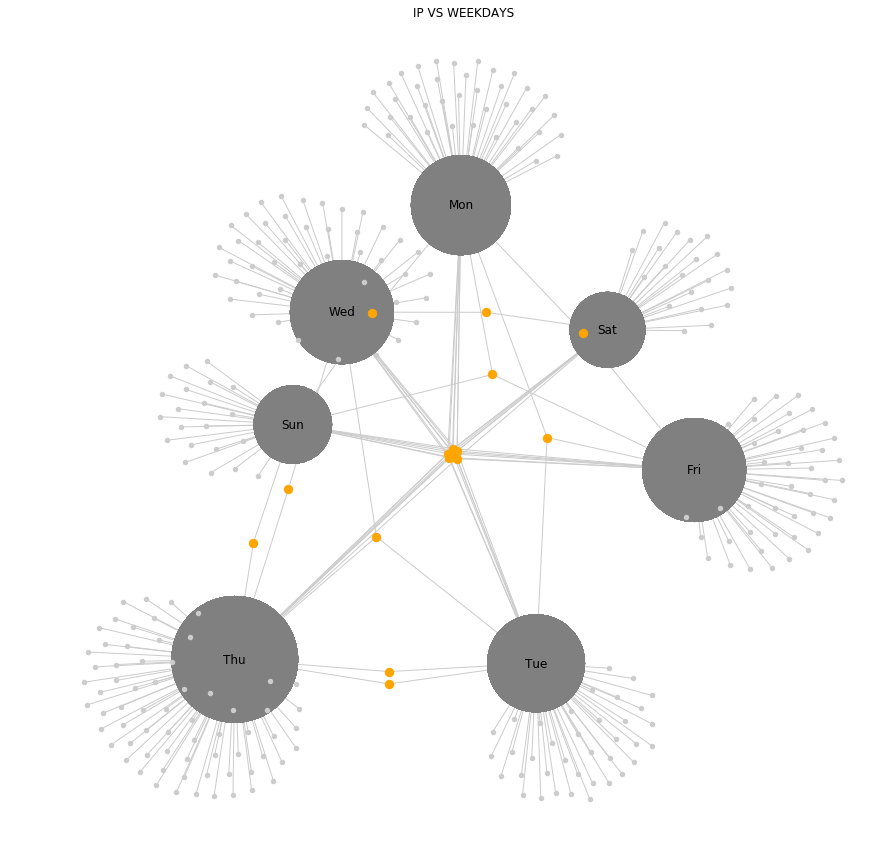

In [142]:
plt.figure(figsize=(15, 15))
g = nx.from_pandas_edgelist(data_cat[0:500], source='ip', target='weekday') 
layout = nx.spring_layout(g,seed=200)
week_size = [g.degree(weekday) * 200 for weekday in weekdays]
nx.draw_networkx_nodes(g, layout, with_labels=True, nodelist=weekdays, node_size=week_size, node_color='gray')
nx.draw_networkx_nodes(g, layout, with_labels=True, nodelist=ips, node_color='#cccccc', node_size=20)
popular_ips = [ip for ip in ips if g.degree(ip) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_ips, node_color='orange', node_size=70)
nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")
node_labels = dict(zip(weekdays, weekdays))
nx.draw_networkx_labels(g, layout, labels=node_labels)
plt.axis('off')
plt.title("IP VS WEEKDAYS")
plt.show()

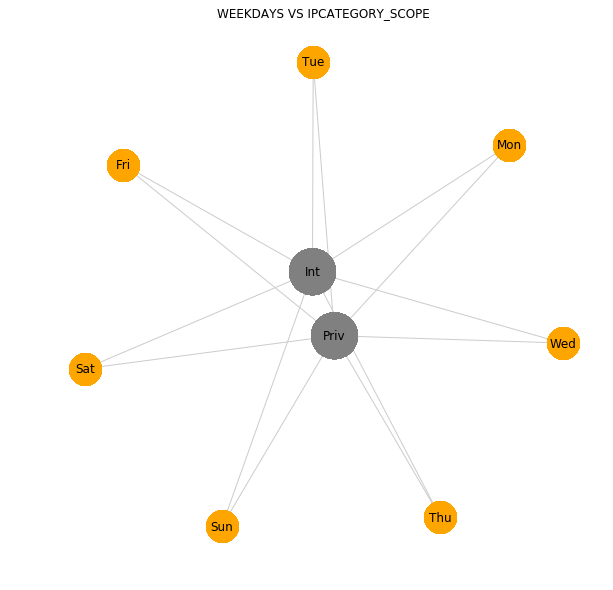

In [143]:
plt.figure(figsize=(10, 10))
g1 = nx.from_pandas_edgelist(data_cat[0:500], source='weekday', target='ipcategory_scope') 
layout = nx.spring_layout(g1,seed=200)
week_size = [g1.degree(weekday) * 300 for weekday in ipcategory_scope]
nx.draw_networkx_nodes(g1, layout, with_labels=True, nodelist=ipcategory_scope, node_size=week_size, node_color='gray')
nx.draw_networkx_nodes(g1, layout, with_labels=True, nodelist=weekdays, node_color='#cccccc', node_size=70)
popular_week = [week for week in weekdays if g1.degree(week) > 0]
nx.draw_networkx_nodes(g1, layout, nodelist=popular_week, node_color='orange', node_size=1000)
nx.draw_networkx_edges(g1, layout, width=1, edge_color="#cccccc")
node_labels = dict(zip(ipcategory_scope, ipcategory_scope))
nx.draw_networkx_labels(g1, layout, labels=node_labels)

node_labels_week = dict(zip(weekdays, weekdays))
nx.draw_networkx_labels(g, layout, labels=node_labels_week)
plt.axis('off')
plt.title("WEEKDAYS VS IPCATEGORY_SCOPE")
plt.show()

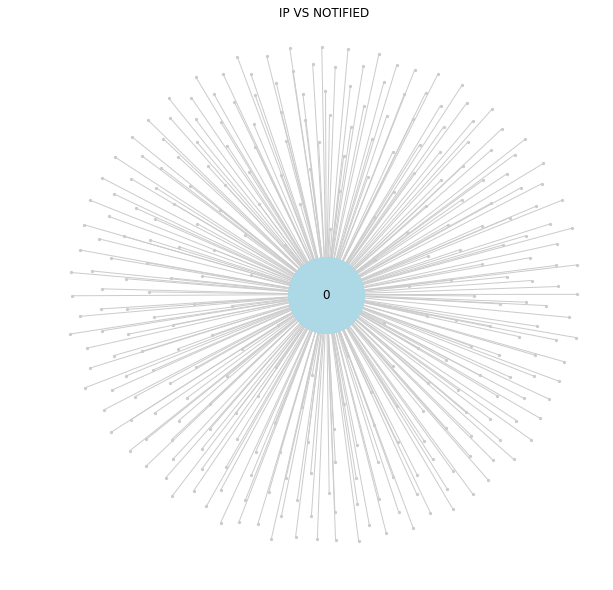

In [144]:
plt.figure(figsize=(10, 10))
g2 = nx.from_pandas_edgelist(data_cat[0:500], source='ip', target='notified') 
layout = nx.spring_layout(g2)
notify_size = [g2.degree(notify) * 20 for notify in notify_cat]
nx.draw_networkx_nodes(g2, layout, with_labels=True, nodelist=notify_cat, node_size=notify_size, node_color='lightblue')
nx.draw_networkx_nodes(g2, layout, nodelist=ips, node_color='#cccccc', node_size=5)
popular_ips = [ip for ip in ips if g2.degree(ip) > 1]
nx.draw_networkx_nodes(g2, layout , nodelist=popular_ips, node_color='orange', node_size=100)
nx.draw_networkx_edges(g2, layout, width=1, edge_color="#cccccc")
node_labels = dict(zip(notify_cat, notify_cat))
nx.draw_networkx_labels(g2, layout, labels=node_labels)
plt.axis('off')
plt.title('IP VS NOTIFIED')
plt.show()

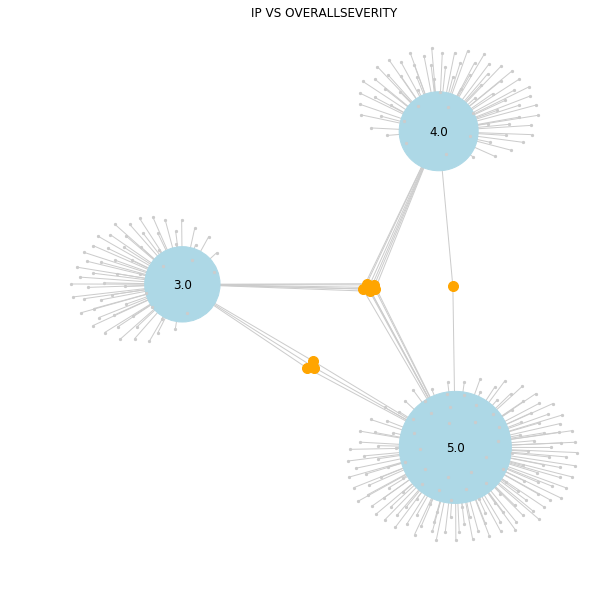

In [145]:
plt.figure(figsize=(10, 10))
g4 = nx.from_pandas_edgelist(data_cat[0:500], source='ip', target='overallseverity') 
layout = nx.spring_layout(g4)
sever_size = [g4.degree(sever) * 80 for sever in overallseverity]
nx.draw_networkx_nodes(g4,layout,with_labels=True, nodelist=overallseverity,  node_size=sever_size, node_color='lightblue')
nx.draw_networkx_nodes(g4, layout, with_labels=True,nodelist=ips, node_color='#cccccc', node_size=5)
popular_ip = [ip for ip in ips if g4.degree(ip) > 1]
nx.draw_networkx_nodes(g4, layout ,with_labels=True, nodelist=popular_ip, node_color='orange', node_size=100)
nx.draw_networkx_edges(g4, layout, with_labels=True,width=1, edge_color="#cccccc")
node_labels = dict(zip(overallseverity,overallseverity))
nx.draw_networkx_labels(g4, layout, labels=node_labels)
plt.axis('off')
plt.title("IP VS OVERALLSEVERITY")
plt.show()

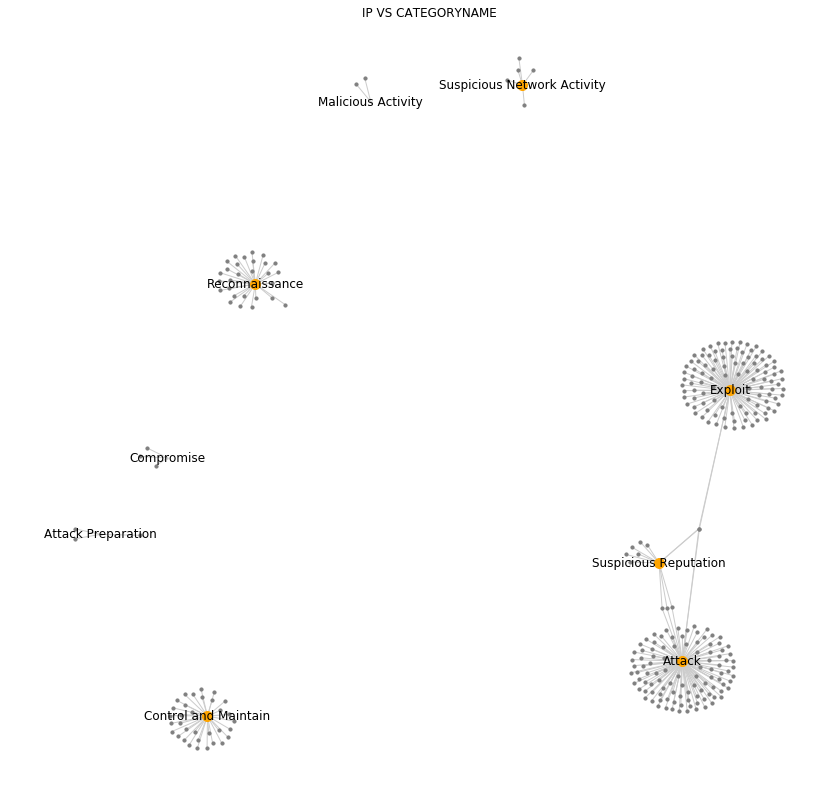

In [146]:
plt.figure(figsize=(14, 14))
g3 = nx.from_pandas_edgelist(data_cat[0:500], source='ip', target='categoryname') 
layout = nx.spring_layout(g3)

nx.draw_networkx_nodes(g3, layout, with_labels=True, nodelist=ips, node_size=10, node_color='gray')
ip_cat_size = [g3.degree(ip) * 10 for ip in ip_cat_name]
nx.draw_networkx_nodes(g3, layout, with_labels=True, nodelist=ip_cat_name, node_color='#cccccc', node_size=2)

popular_ips = [ip for ip in ip_cat_name if g3.degree(ip) > 3]
nx.draw_networkx_nodes(g3, layout, nodelist=popular_ips, node_color='orange', node_size=100)
nx.draw_networkx_edges(g3, layout, width=1, edge_color="#cccccc")
# node_labels = dict(zip(ips, ips))
# nx.draw_networkx_labels(g3, layout, labels=node_labels)

node_labels_scope = dict(zip(ip_cat_name, ip_cat_name))
nx.draw_networkx_labels(g3, layout, labels=node_labels_scope)
plt.axis('off')
plt.title("IP VS CATEGORYNAME")
plt.show()

# of edges: 1246
# of nodes: 312


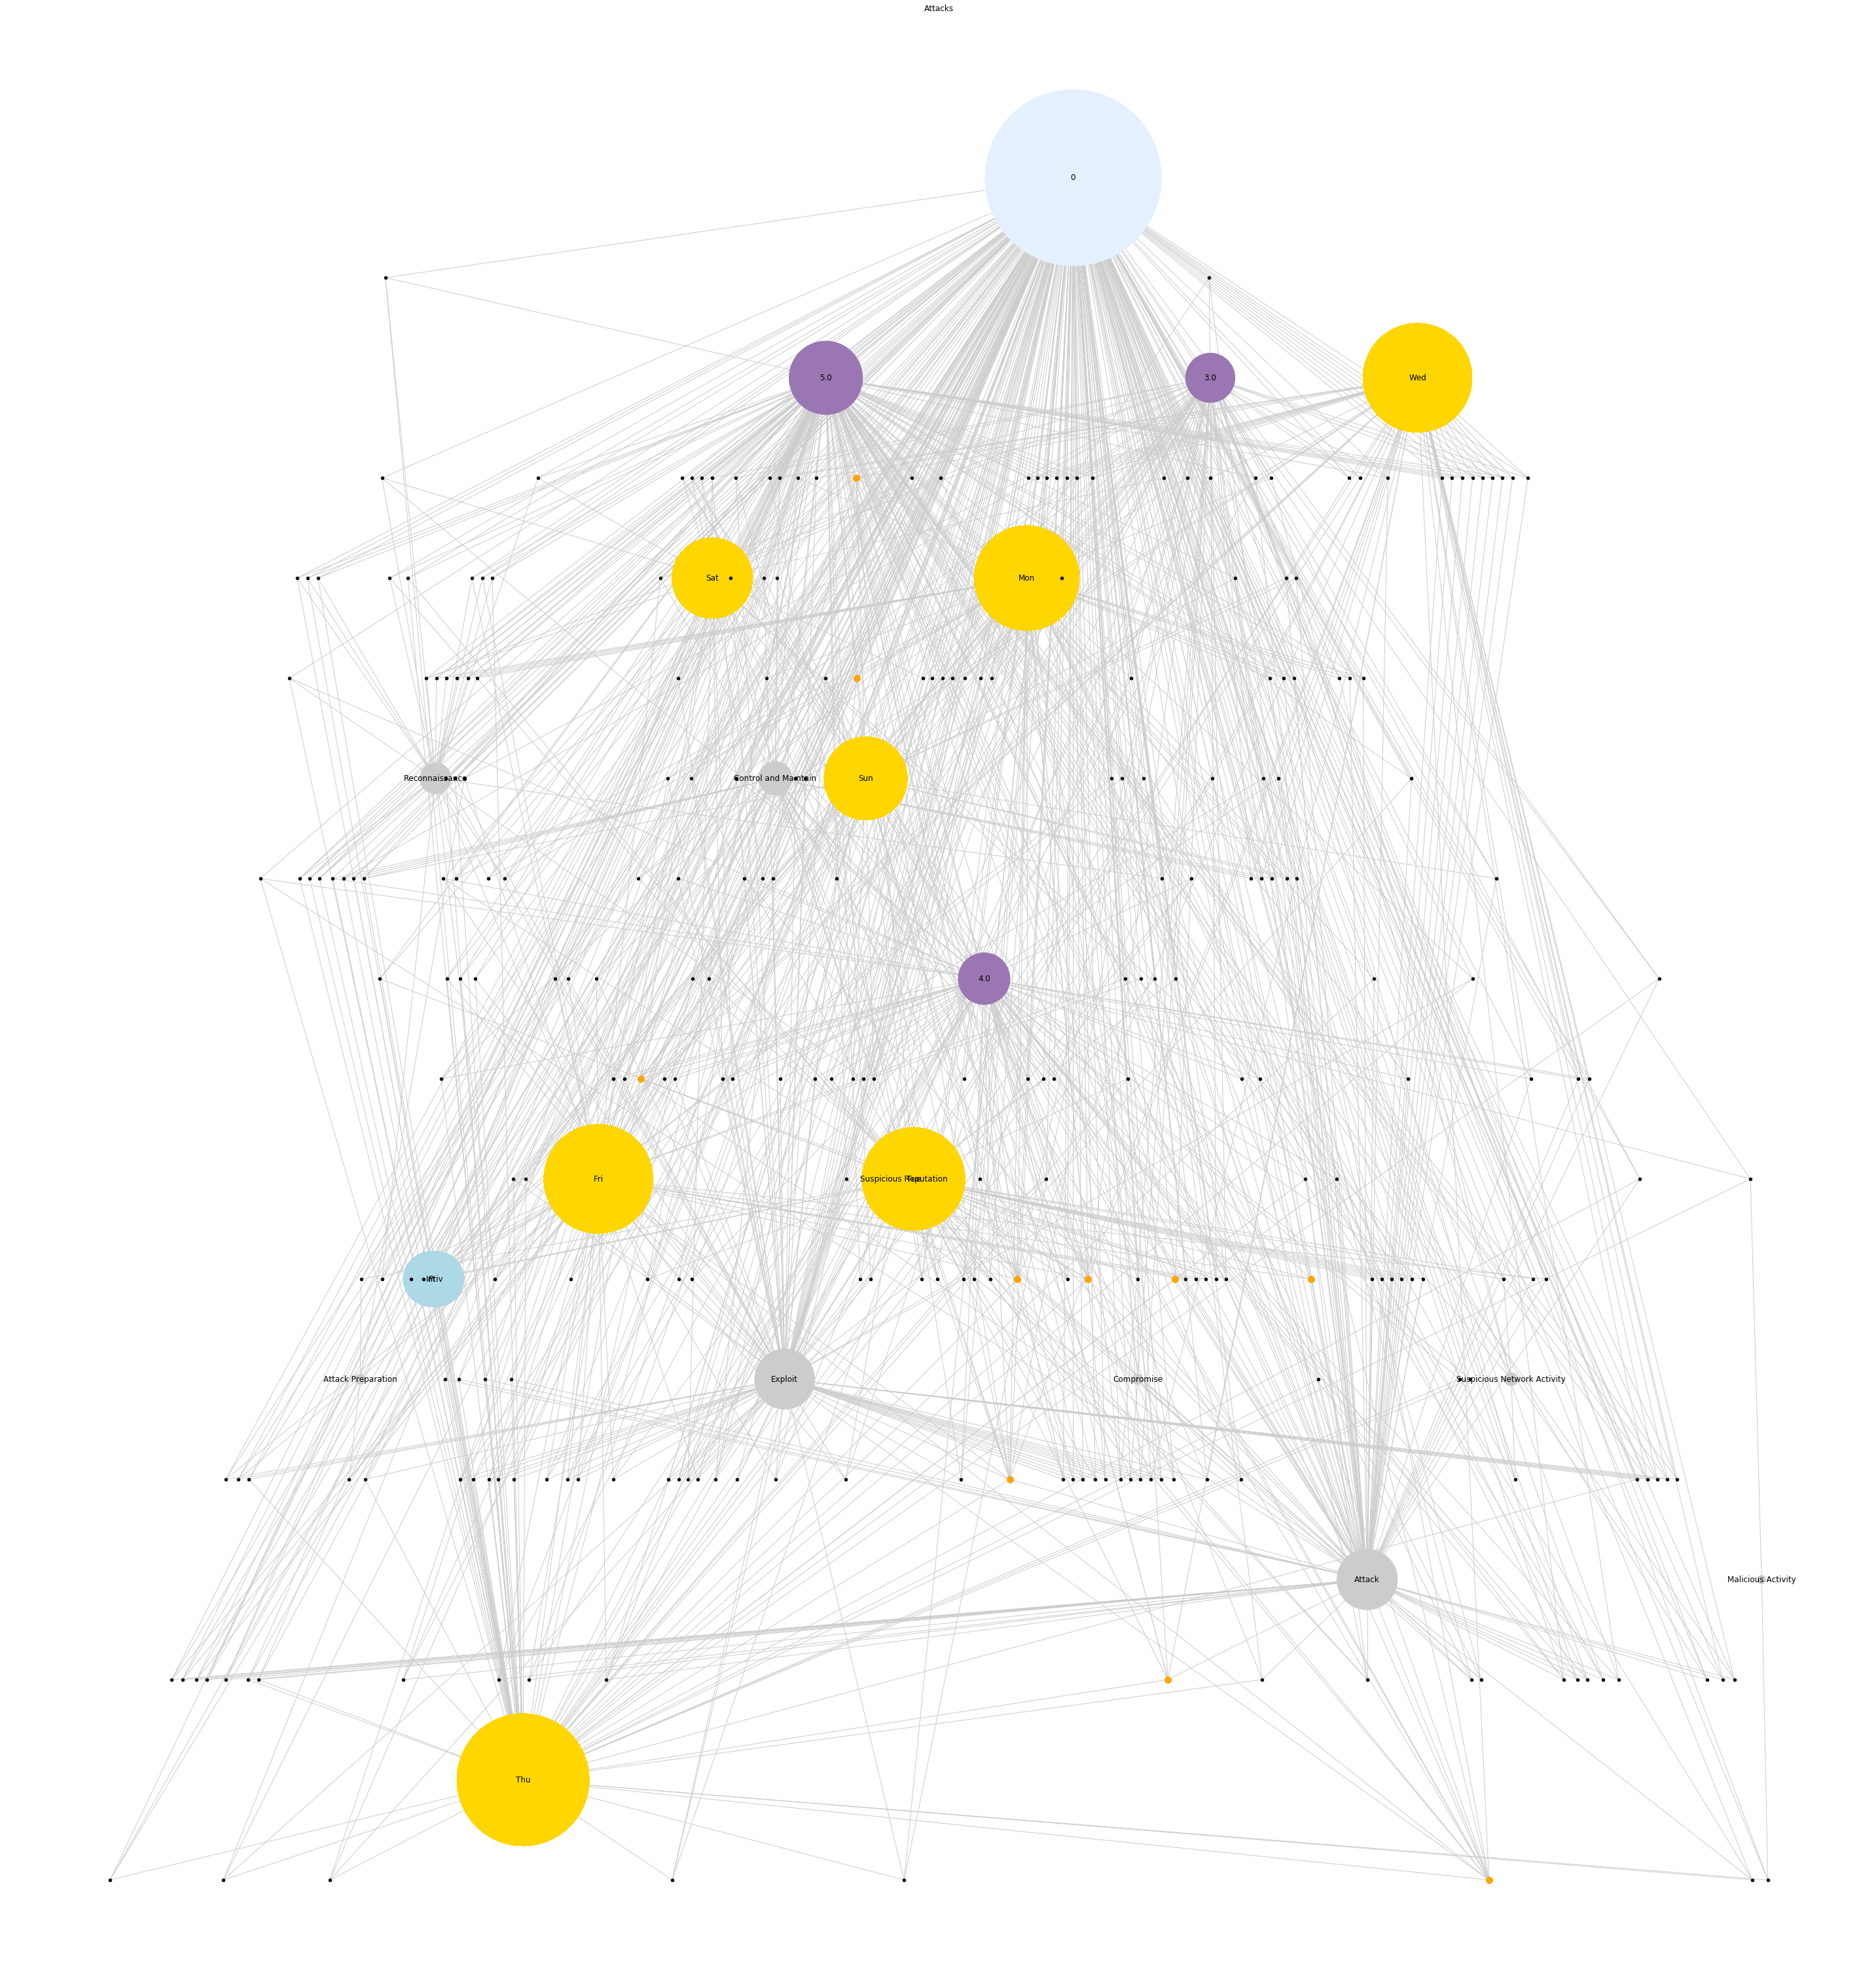

In [147]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 55))

F= nx.compose(g,g1)
G= nx.compose(F,g3)
H=nx.compose(G,g2)
J=nx.compose(H,g4)
layout = nx.nx_agraph.pygraphviz_layout(J, prog='dot')



sever_size = [J.degree(sever) * 80 for sever in overallseverity]
nx.draw_networkx_nodes(J,layout, nodelist=overallseverity,node_size=sever_size, node_color='#9A76B3')

ip_cat_size = [J.degree(cat) * 80 for cat in ip_cat_name]
nx.draw_networkx_nodes(J, layout, with_labels=True, nodelist=ip_cat_name, node_color='#cccccc', node_size=ip_cat_size)

ipscope_size = [J.degree(ipscope) * 1000 for ipscope in ipcategory_scope]
nx.draw_networkx_nodes(J, layout, nodelist=ipcategory_scope, node_size=ipscope_size, node_color='lightblue')

week_size = [J.degree(weekday) * 500 for weekday in weekdays]
nx.draw_networkx_nodes(J,layout, with_labels=True, nodelist=weekdays, node_size=week_size, # a LIST of sizes, based on g.degree
                       node_color='#FFD600')

notify_size = [J.degree(notify) * 250 for notify in notify_cat]
nx.draw_networkx_nodes(J, layout, with_labels=True, nodelist=notify_cat, node_size=notify_size, node_color='#E5F0FF')
# # Draw EVERYONE

nx.draw_networkx_nodes(J, layout, nodelist=ips, node_color='black', node_size=20)

# Draw POPULAR IPS
popular_ips = [ip for ip in ips if J.degree(ip)>5]

nx.draw_networkx_nodes(J, layout, nodelist=popular_ips, node_color='orange', node_size=100)
nx.draw_networkx_edges(J, layout,nodelist=ips, edge_color="#cccccc")

print('# of edges: {}'.format(J.number_of_edges()))
print('# of nodes: {}'.format(J.number_of_nodes()))
node_labels = dict(zip(ipcategory_scope,ipcategory_scope))
nx.draw_networkx_labels(J, layout, labels=node_labels)


node_labels_week= dict(zip(weekdays, weekdays))
nx.draw_networkx_labels(J, layout, labels=node_labels_week,)
# # 4. Turn off the axis because I know you don't want it
node_labels_sever= dict(zip(overallseverity,overallseverity))
nx.draw_networkx_labels(J, layout, labels=node_labels_sever)

node_labels_notify= dict(zip(notify_cat,notify_cat))
nx.draw_networkx_labels(J, layout, labels=node_labels_notify)


node_labels_cat= dict(zip(ip_cat_name,ip_cat_name))
nx.draw_networkx_labels(J, layout, labels=node_labels_cat)

plt.axis('off')
plt.title("Attacks")
# print("radius: %d" % nx.radius(G))
# print("diameter: %d" % nx.diameter(G))
# print("eccentricity: %s" % nx.eccentricity(G))
# print("center: %s" % nx.center(G))
# print("periphery: %s" % nx.periphery(G))
# print("density: %s" % nx.density(G))
# 5. Tell matplotlib to show it
plt.show()


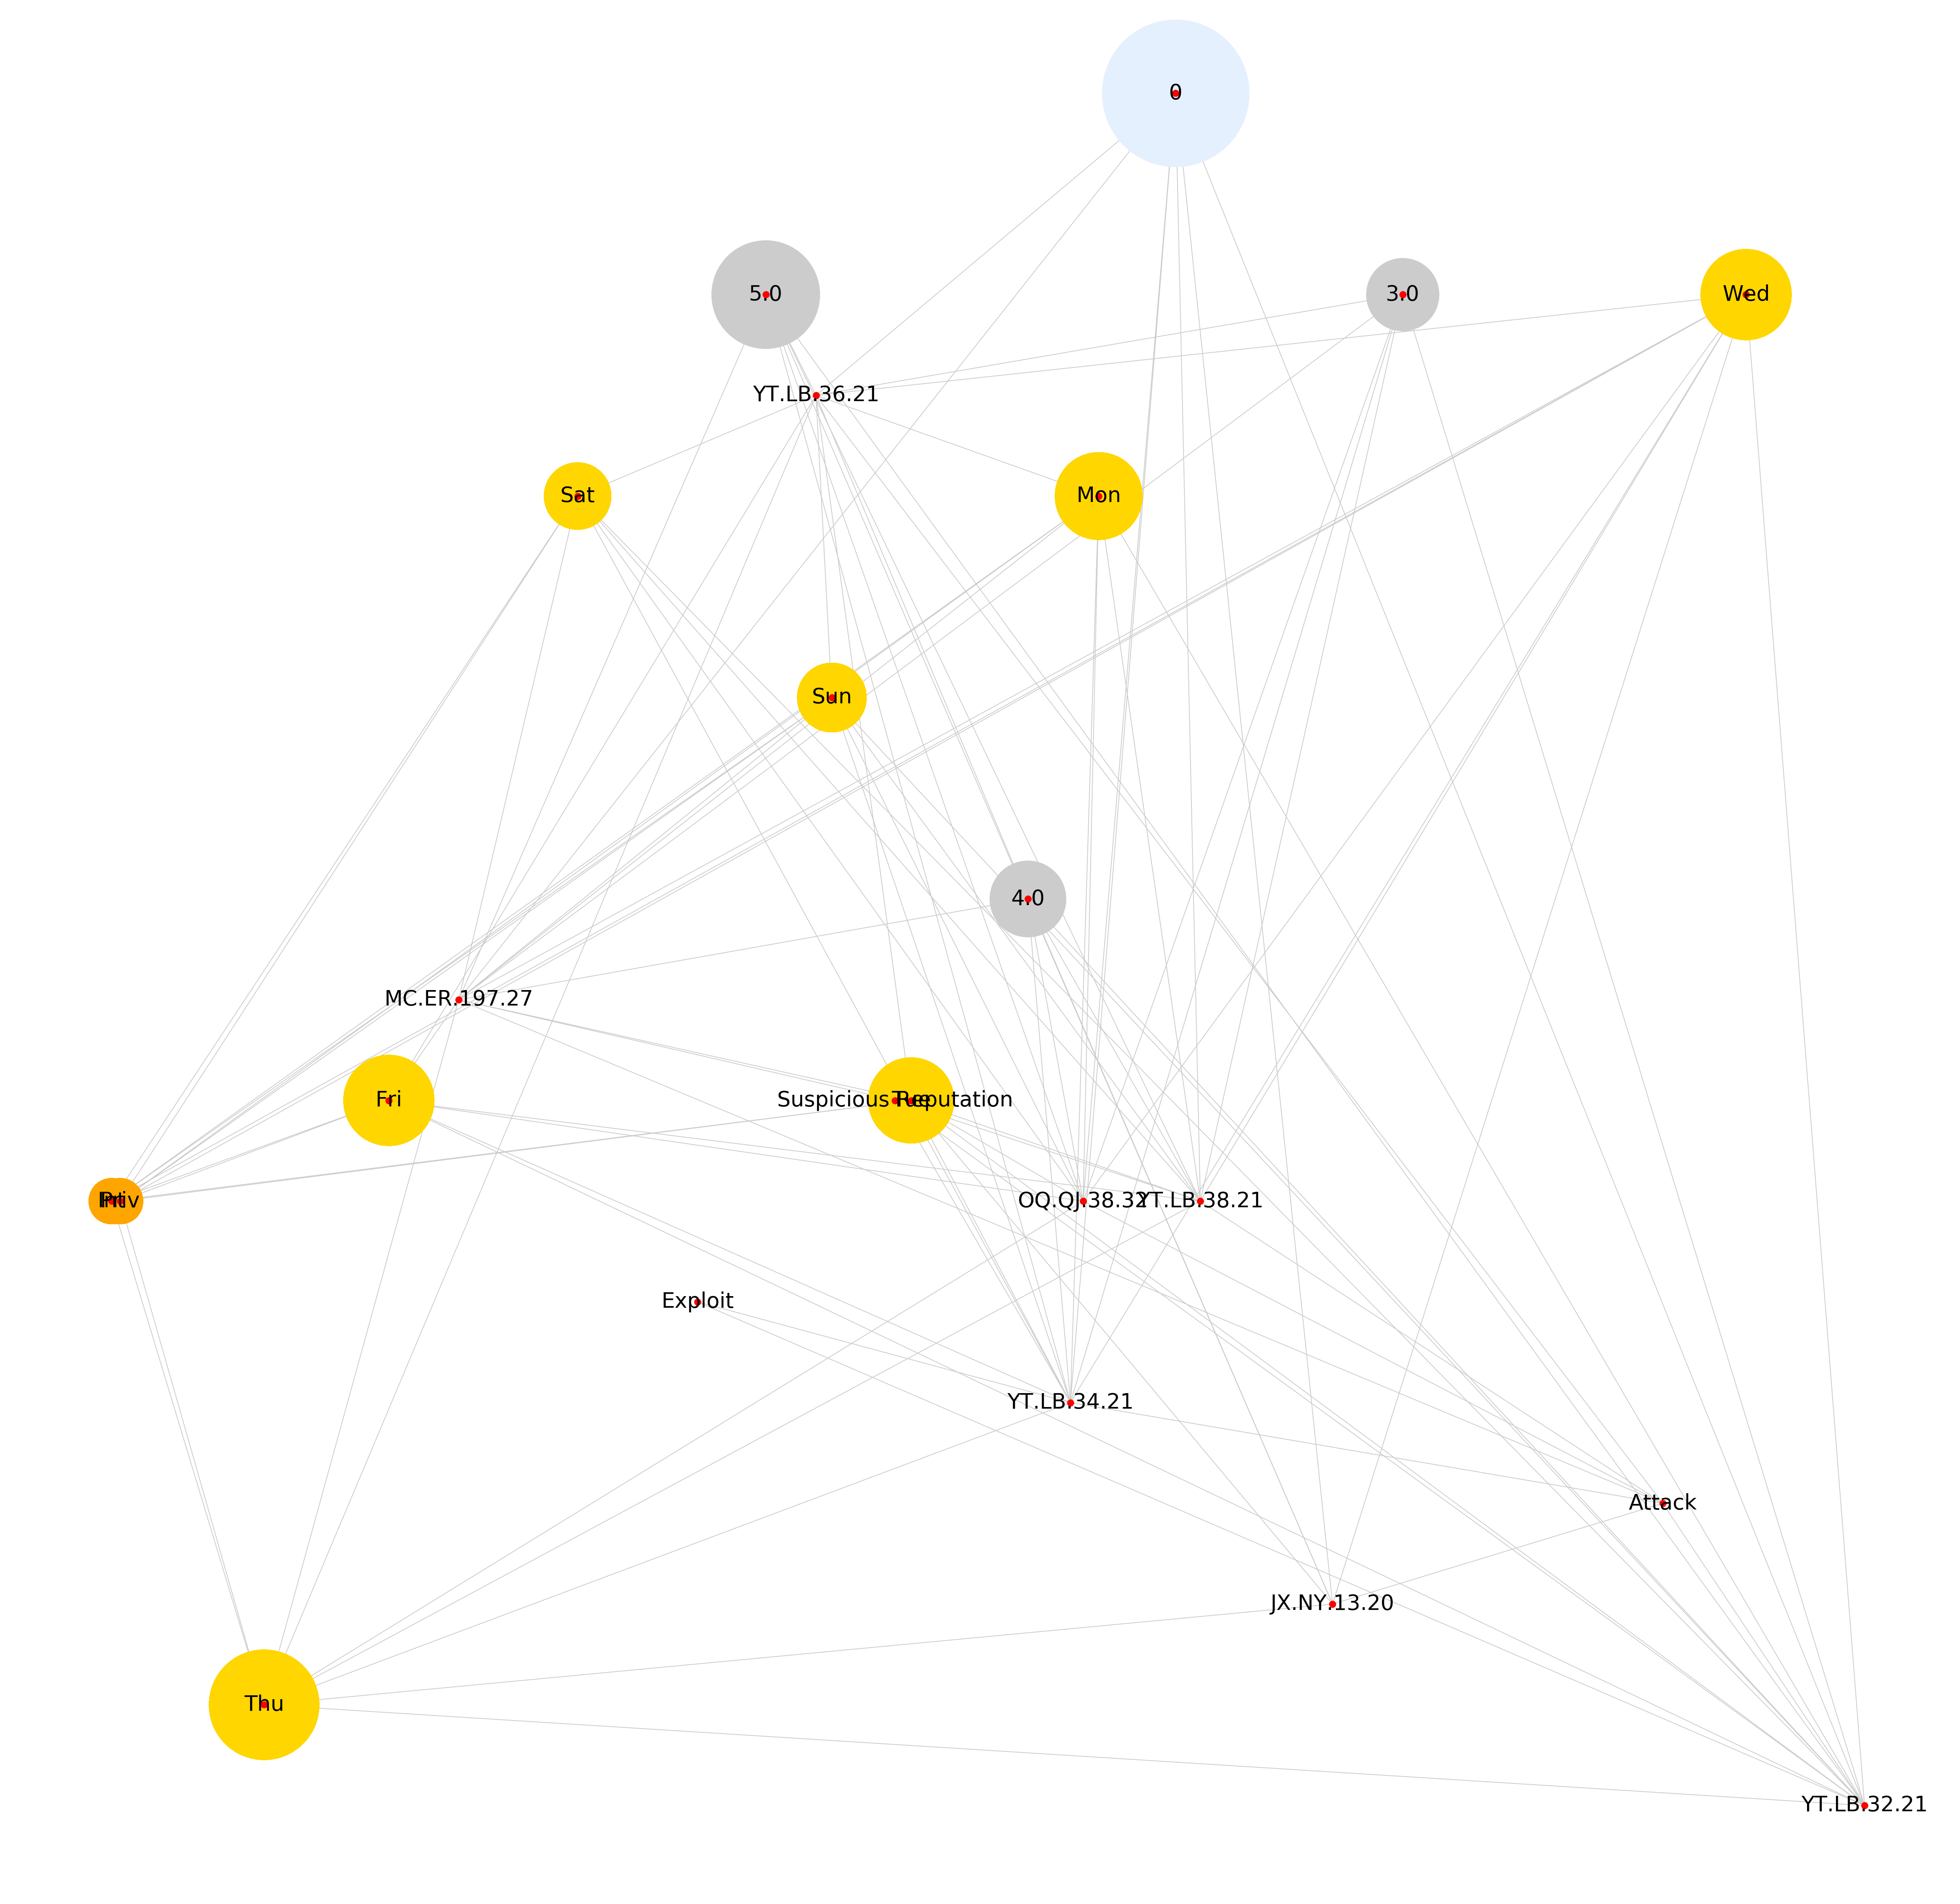

[0, 3.0, 4.0, 5.0, 'Wed', 'Sun', 'Fri', 'Suspicious Reputation', 'Attack', 'OQ.QJ.38.32', 'JX.NY.13.20', 'YT.LB.36.21', 'MC.ER.197.27', 'Mon', 'Tue', 'YT.LB.38.21', 'Thu', 'YT.LB.32.21', 'Int', 'YT.LB.34.21', 'Exploit', 'Priv', 'Sat']
# of edges: 99
# of nodes: 23


In [345]:
plt.figure(figsize=(90, 90))
f =nx.Graph()  
layout = nx.nx_agraph.pygraphviz_layout(J, prog='dot')

notify_size = [J.degree(notify) * 500 for notify in notify_cat]
nx.draw_networkx_nodes(f, layout, nodelist=notify_cat, node_size=notify_size, node_color='#E5F0FF')

sever_size = [J.degree(sever) * 500 for sever in overallseverity]
nx.draw_networkx_nodes(f,layout, nodelist=overallseverity,node_size=sever_size, node_color='#cccccc')

ipscope_size = [J.degree(ipscope) * 2000 for ipscope in ipcategory_scope]
nx.draw_networkx_nodes(f, layout, nodelist=ipcategory_scope, node_size=ipscope_size, node_color='orange')

week_size = [J.degree(weekday) * 1000 for weekday in weekdays]
nx.draw_networkx_nodes(f,
                       layout, 
                       nodelist=weekdays, 
                       node_size=week_size, # a LIST of sizes, based on g.degree
                       node_color='#FFD600')

# ip_cat_size = [J.degree(cat) * 500 for cat in ip_cat_name ]
# nx.draw_networkx_nodes(f, layout, nodelist=ip_cat_name, node_size=ip_cat_size, node_color='#E5999F')

fedges = filter(lambda x: J.degree()[x[0]] >6 and J.degree()[x[1]] >6, J.edges())

f.add_edges_from(fedges)

nx.draw(f,layout,edge_color="#cccccc",width=2,font_size=55,with_labels=True)


plt.axis('off')
plt.savefig("Graph.png", format="PNG")
plt.show()
print(f.nodes())
print('# of edges: {}'.format(f.number_of_edges()))
print('# of nodes: {}'.format(f.number_of_nodes()))

In [337]:
from networkx.algorithms import community
import itertools
k = 5
comp = community.girvan_newman(f)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    print(tuple(sorted(c) for c in communities)) 


([0, 3.0, 4.0, 5.0, 'Attack', 'Fri', 'Int', 'JX.NY.13.20', 'MC.ER.197.27', 'Mon', 'OQ.QJ.38.32', 'Priv', 'Sat', 'Sun', 'Suspicious Reputation', 'Thu', 'Tue', 'Wed', 'YT.LB.32.21', 'YT.LB.34.21', 'YT.LB.36.21', 'YT.LB.38.21'], ['Exploit'])
([0, 3.0, 4.0, 5.0, 'Attack', 'Fri', 'Int', 'JX.NY.13.20', 'MC.ER.197.27', 'Mon', 'OQ.QJ.38.32', 'Priv', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'YT.LB.32.21', 'YT.LB.34.21', 'YT.LB.36.21', 'YT.LB.38.21'], ['Suspicious Reputation'], ['Exploit'])
([0, 3.0, 4.0, 5.0, 'Attack', 'Fri', 'Int', 'MC.ER.197.27', 'Mon', 'OQ.QJ.38.32', 'Priv', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'YT.LB.32.21', 'YT.LB.34.21', 'YT.LB.36.21', 'YT.LB.38.21'], ['Suspicious Reputation'], ['JX.NY.13.20'], ['Exploit'])
([0, 3.0, 5.0, 'Attack', 'Fri', 'Int', 'MC.ER.197.27', 'Mon', 'OQ.QJ.38.32', 'Priv', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'YT.LB.32.21', 'YT.LB.34.21', 'YT.LB.36.21', 'YT.LB.38.21'], [4.0], ['Suspicious Reputation'], ['JX.NY.13.20'], ['Exploit'])


In [296]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]
       
    return pos

def _position_communities(g, partition, **kwargs):

    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    
    hypergraph = nx.Graph()
    hypergraph.add_nodes_from(communities)
    
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos

def _find_between_community_edges(g, partition):

    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]
    
    return edges

def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

def test():
    # to install networkx 2.0 compatible version of python-louvain use:
    # pip install -U git+https://github.com/taynaud/python-louvain.git@networkx2
    from community import community_louvain
    
    f = nx.karate_club_graph()
    
    partition = community_louvain.best_partition(f)
    pos = community_layout(f, partition)

    
    nx.draw(f, pos, node_color=partition.values(),with_labels=True)
    
  
    plt.show()
    return

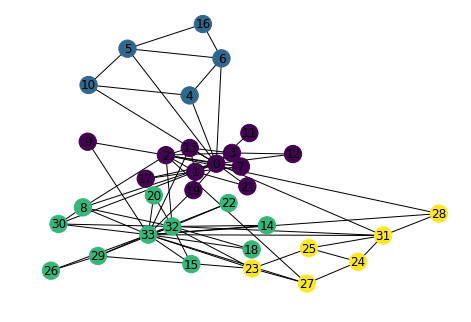

In [315]:
test()

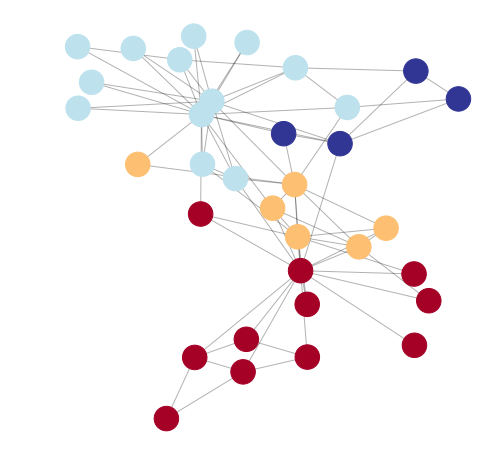

In [348]:
import community
f=nx.karate_club_graph()
    
partition = community.best_partition(f)
pos = nx.spring_layout(f)
plt.figure(figsize=(8, 8))
plt.axis('off')
nx.draw_networkx_nodes(f, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition.values()),with_labels=True)
nx.draw_networkx_edges(f, pos, alpha=0.3)
plt.show(f)